# Construction of IO dataset for OPF BBMS

In this notebook, we aim at constructing


In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import dill as pickle
from pathlib import Path
import tqdm

import res.models.physical.electrical.PowerFlowPowerGrid as PG

In [3]:
# Show current working directory
print(f"Current working directory: {os.getcwd()}")

Current working directory: D:\projects\IPTLC_BBMs


In [4]:
# Data folder path
data_folder = Path("../CPS_GBM_IPTLC/data/ScenarioGeneration/PowerGrid/MonteCarlo/2023-12-06_18-00-46")

# Target simulation folder
target_folder = data_folder / "0"

# Specify the path to save processed data and create the folder if it doesn't exist
processed_data_folder = Path("data/OPF/") / data_folder.name
os.makedirs(processed_data_folder, exist_ok=True)

# Print the folders
print(f"Data folder: {data_folder}")
print(f"Target folder: {target_folder}")
print(f"Processed data folder: {processed_data_folder}")

Data folder: ..\CPS_GBM_IPTLC\data\ScenarioGeneration\PowerGrid\MonteCarlo\2023-12-06_18-00-46
Target folder: ..\CPS_GBM_IPTLC\data\ScenarioGeneration\PowerGrid\MonteCarlo\2023-12-06_18-00-46\0
Processed data folder: data\OPF\2023-12-06_18-00-46


In [13]:
# Open the dataframes
sim_u_df = pd.read_csv(target_folder / "external_stimuli.csv", index_col=0)
sim_x_df = pd.read_csv(target_folder / "state.csv", index_col=0)
sim_theta_df = pd.read_csv(target_folder / "condition.csv", index_col=0)

# Open the plant
with open(data_folder / "plant.p", "rb") as f:
    plant = pickle.load(f)

# Print the shapes of the dataframes
print(f"u shape: {sim_u_df.shape}")
print(f"x shape: {sim_x_df.shape}")
print(f"theta shape: {sim_theta_df.shape}")

u shape: (97, 28)
x shape: (97, 139)
theta shape: (97, 158)


In [6]:
sim_u_df.head()

,Pd,Pd.1,Pd.2,Pd.3,Pd.4,Pd.5,Pd.6,Pd.7,Pd.8,Pd.9,Pd.10,Pd.11,Pd.12,Pd.13,Qd,Qd.1,Qd.2,Qd.3,Qd.4,Qd.5,Qd.6,Qd.7,Qd.8,Qd.9,Qd.10,Qd.11,Qd.12,Qd.13
0,0.0,14.556323,47.123383,22.191755,4.712971,7.289077,0.0,0.0,13.082205,5.084837,1.952913,3.102880,9.038774,9.476645,0.0,7.028518,12.763807,-2.247910,1.048428,5.155498,0.0,0.0,7.717014,3.033411,0.721996,0.950130,2.958551,3.101872
900,0.0,13.968725,50.224851,27.714751,4.644591,4.736703,0.0,0.0,12.766659,5.637937,2.097461,2.600310,9.037949,7.823731,0.0,9.397913,8.906347,-2.061006,0.763172,4.426070,0.0,0.0,9.722176,3.268228,1.054579,0.937279,2.911330,3.048261
1800,0.0,13.032938,48.497201,33.992821,3.780178,6.144648,0.0,0.0,18.406073,6.028764,1.790102,2.968753,8.179026,6.032426,0.0,9.361921,9.052135,-1.734875,0.826703,3.176092,0.0,0.0,9.095054,2.930612,1.026258,0.813046,3.528570,2.154418
2700,0.0,12.927204,45.545196,27.585807,3.925114,5.252617,0.0,0.0,14.012997,4.497281,1.453256,3.276376,8.606568,9.024170,0.0,7.308870,10.111185,-2.346932,0.724904,3.481796,0.0,0.0,10.261761,3.396639,0.865064,1.165194,2.178819,3.004248
3600,0.0,10.890928,39.297153,29.272179,4.345949,6.919566,0.0,0.0,14.927784,3.922806,1.832543,2.650669,5.929407,7.201320,0.0,7.071748,11.426989,-1.975823,0.851476,3.926387,0.0,0.0,9.306241,3.066271,0.967078,1.034497,3.136463,2.433796


In [7]:
sim_x_df.head()

,Pd,Pd.1,Pd.2,Pd.3,Pd.4,Pd.5,Pd.6,Pd.7,Pd.8,Pd.9,Pd.10,Pd.11,Pd.12,Pd.13,Qd,Qd.1,Qd.2,Qd.3,Qd.4,Qd.5,Qd.6,Qd.7,Qd.8,Qd.9,Qd.10,Qd.11,Qd.12,Qd.13,Pg,Pg.1,Pg.2,Pg.3,Pg.4,Qg,Qg.1,Qg.2,Qg.3,Qg.4,V,V.1,V.2,V.3,V.4,V.5,V.6,V.7,V.8,V.9,V.10,V.11,V.12,V.13,phi,phi.1,phi.2,phi.3,phi.4,phi.5,phi.6,phi.7,phi.8,phi.9,phi.10,phi.11,phi.12,phi.13,ILine,ILine.1,ILine.2,ILine.3,ILine.4,ILine.5,ILine.6,ILine.7,ILine.8,ILine.9,ILine.10,ILine.11,ILine.12,ILine.13,ILine.14,LTrafo,LTrafo.1,LTrafo.2,LTrafo.3,LTrafo.4,piGen,piGen.1,piGen.2,piGen.3,piGen.4,piLine,piLine.1,piLine.2,piLine.3,piLine.4,piLine.5,piLine.6,piLine.7,piLine.8,piLine.9,piLine.10,piLine.11,piLine.12,piLine.13,piLine.14,piTrafo,piTrafo.1,piTrafo.2,piTrafo.3,piTrafo.4,piBus,piBus.1,piBus.2,piBus.3,piBus.4,piBus.5,piBus.6,piBus.7,piBus.8,piBus.9,piBus.10,piBus.11,piBus.12,piBus.13,piLoad,piLoad.1,piLoad.2,piLoad.3,piLoad.4,piLoad.5,piLoad.6,piLoad.7,piLoad.8,piLoad.9,piLoad.10,piLoad.11,piLoad.12,piLoad.13
0,0.0,14.556323,47.123383,22.191755,4.712971,7.289077,0.0,0.0,13.082205,5.084837,1.952913,3.102880,9.038774,9.476645,0.0,7.028518,12.763807,-2.247910,1.048428,5.155498,0.0,0.0,7.717014,3.033411,0.721996,0.950130,2.958551,3.101872,119.042074,22.097926,1.556064e-11,9.785433e-13,-1.749435e-11,3.290923,8.085947,12.239712,-5.999253,-5.999934,1.058203,1.043453,1.023394,1.025762,1.026163,1.059999,1.050949,1.040795,1.058759,1.055118,1.055938,1.052157,1.049308,1.043459,0.0,-2.449307,-6.252896,-5.095522,-4.353880,-7.437195,-6.766366,-6.766366,-7.637005,-7.770916,-7.687022,-7.926012,-8.024023,-8.439795,0.324700,0.160684,0.150680,0.117699,0.091295,0.049267,0.128624,7.739273,11.681900,28.872642,13.525791,19.729727,2.325153,3.138499,6.861854,0.151567,0.088007,0.305994,0.058226,0.163715,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
900,0.0,13.968725,50.224851,27.714751,4.644591,4.736703,0.0,0.0,12.766659,5.637937,2.097461,2.600310,9.037949,7.823731,0.0,9.397913,8.906347,-2.061006,0.763172,4.426070,0.0,0.0,9.722176,3.268228,1.054579,0.937279,2.911330,3.048261,122.292513,22.721510,1.299740e-11,-5.171726e-12,-1.527436e-11,3.555777,11.674836,9.071357,-5.999496,-5.999981,1.059300,1.044210,1.023073,1.025156,1.026302,1.059999,1.048407,1.038228,1.055163,1.051681,1.053773,1.052516,1.049237,1.042637,0.0,-2.518611,-6.537822,-5.256077,-4.441578,-7.251024,-6.784329,-6.784329,-7.582922,-7.709633,-7.562531,-7.697760,-7.812805,-8.189520,0.333982,0.164208,0.159145,0.122449,0.092743,0.054378,0.141598,10.669310,10.882996,28.354797,12.881038,15.551876,4.542805,3.633305,6.823326,0.138099,0.080584,0.288545,0.058370,0.148210,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1800,0.0,13.032938,48.497201,33.992821,3.780178,6.144648,0.0,0.0,18.406073,6.028764,1.790102,2.968753,8.179026,6.032426,0.0,9.361921,9.052135,-1.734875,0.826703,3.176092,0.0,0.0,9.095054,2.930612,1.026258,0.813046,3.528570,2.154418,129.017916,23.992108,-5.607376e-11,2.874593e-11,8.895616e-11,4.095875,11.311077,8.697293,-5.999608,-5.999997,1.057842,1.041923,1.020314,1.021645,1.023466,1.059999,1.046155,1.035953,1.053723,1.050618,1.053336,1.052442,1.049570,1.044537,0.0,-2.643894,-6.749596,-5.700619,-4.790780,-7.816055,-7.456020,-7.456020,-8.371394,-8.472158,-8.213040,-8.270594,-8.339220,-8.755142,0.350170,0.175651,0.162197,0.135377,0.101308,0.044518,0.158184,12.467152,11.036142,26.970249,11.111704,10.744351,7.281571,2.921316,6.526002,0.158358,0.092084,0.294798,0.058501,0.168965,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2700,0.0,12.927204,45.545196,27.585807,3.9

In [8]:
sim_theta_df.head()

,R,R.1,R.2,R.3,R.4,R.5,R.6,R.7,R.8,R.9,R.10,R.11,R.12,R.13,R.14,X,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,X.11,X.12,X.13,X.14,piGen,piGen.1,piGen.2,piGen.3,piGen.4,piLine,piLine.1,piLine.2,piLine.3,piLine.4,piLine.5,piLine.6,piLine.7,piLine.8,piLine.9,piLine.10,piLine.11,piLine.12,piLine.13,piLine.14,piTrafo,piTrafo.1,piTrafo.2,piTrafo.3,piTrafo.4,piBus,piBus.1,piBus.2,piBus.3,piBus.4,piBus.5,piBus.6,piBus.7,piBus.8,piBus.9,piBus.10,piBus.11,piBus.12,piBus.13,piLoad,piLoad.1,piLoad.2,piLoad.3,piLoad.4,piLoad.5,piLoad.6,piLoad.7,piLoad.8,piLoad.9,piLoad.10,piLoad.11,piLoad.12,piLoad.13,failRateGen,failRateGen.1,failRateGen.2,failRateGen.3,failRateGen.4,failRateLine,failRateLine.1,failRateLine.2,failRateLine.3,failRateLine.4,failRateLine.5,failRateLine.6,failRateLine.7,failRateLine.8,failRateLine.9,failRateLine.10,failRateLine.11,failRateLine.12,failRateLine.13,failRateLine.14,failRateTrafo,failRateTrafo.1,failRateTrafo.2,failRateTrafo.3,failRateTrafo.4,repairRateGen,repairRateGen.1,repairRateGen.2,repairRateGen.3,repairRateGen.4,repairRateLine,repairRateLine.1,repairRateLine.2,repairRateLine.3,repairRateLine.4,repairRateLine.5,repairRateLine.6,repairRateLine.7,repairRateLine.8,repairRateLine.9,repairRateLine.10,repairRateLine.11,repairRateLine.12,repairRateLine.13,repairRateLine.14,repairRateTrafo,repairRateTrafo.1,repairRateTrafo.2,repairRateTrafo.3,repairRateTrafo.4,tEventGen,tEventGen.1,tEventGen.2,tEventGen.3,tEventGen.4,tEventLine,tEventLine.1,tEventLine.2,tEventLine.3,tEventLine.4,tEventLine.5,tEventLine.6,tEventLine.7,tEventLine.8,tEventLine.9,tEventLine.10,tEventLine.11,tEventLine.12,tEventLine.13,tEventLine.14,tEventTrafo,tEventTrafo.1,tEventTrafo.2,tEventTrafo.3,tEventTrafo.4
0,3.532005,9.846967,8.563928,10.590547,10.379138,12.212573,2.433038,0.000041,0.000053,0.000029,0.000014,0.000055,0.000035,0.000096,0.000074,10.783732,40.64904,36.080033,32.13432,31.68963,31.170217,7.674548,0.000086,0.000111,0.000056,0.000037,0.000117,0.000083,0.000086,0.000151,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,1.461988e-08,1.461988e-08,1.461988e-08,1.461988e-08,1.461988e-08,0.000012,0.000012,0.000012,0.000012,0.000012,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000023,0.000023,0.000023,0.000023,0.000023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
900,3.532005,9.846967,8.563928,10.590547,10.379138,12.212573,2.433038,0.000041,0.000053,0.000029,0.000014,0.000055,0.000035,0.000096,0.000074,10.783732,40.64904,36.080033,32.13432,31.68963,31.170217,7.674548,0.000086,0.000111,0.000056,0.000037,0.000117,0.000083,0.000086,0.000151,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,9.259259e-08,1.461988e-08,1.461988e-08,1.461988e-08,1.461988e-08,1.461988e-08,0.000012,0.000012,0.000012,0.000012,0.000012,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000035,0.000023,0.000023,0.000023,0.000023,0.000023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180

## Input

The input is the concatenation of the external stimuli and the discrete part of the condition of the system

In [8]:
# Obtain the discrete part of the condition. Those are all the columns that have "pi" in their name, excluding "piBus" and "piLoad"
theta_pi_df = sim_theta_df.loc[:, sim_theta_df.columns.str.contains("pi") & ~sim_theta_df.columns.str.contains("piBus|piLoad")]
theta_pi_df.head()

,piGen,piGen.1,piGen.2,piGen.3,piGen.4,piLine,piLine.1,piLine.2,piLine.3,piLine.4,piLine.5,piLine.6,piLine.7,piLine.8,piLine.9,piLine.10,piLine.11,piLine.12,piLine.13,piLine.14,piTrafo,piTrafo.1,piTrafo.2,piTrafo.3,piTrafo.4
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
900,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1800,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2700,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3600,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [10]:
# Concatenate the external stimuli and the discrete part of the condition side by side
OPF_input = pd.concat((sim_u_df, theta_pi_df), axis=1)
OPF_input.shape

(97, 53)

In [11]:
# Save the input as a csv file
input_path = processed_data_folder / "input_single_example.csv"
OPF_input.to_csv(input_path)

# Save the input as a numpy array
input_path = processed_data_folder / "input_single_example.npy"
np.save(input_path, OPF_input)

,Pd,Pd.1,Pd.2,Pd.3,Pd.4,Pd.5,Pd.6,Pd.7,Pd.8,Pd.9,Pd.10,Pd.11,Pd.12,Pd.13,Qd,Qd.1,Qd.2,Qd.3,Qd.4,Qd.5,Qd.6,Qd.7,Qd.8,Qd.9,Qd.10,Qd.11,Qd.12,Qd.13,piGen,piGen.1,piGen.2,piGen.3,piGen.4,piLine,piLine.1,piLine.2,piLine.3,piLine.4,piLine.5,piLine.6,piLine.7,piLine.8,piLine.9,piLine.10,piLine.11,piLine.12,piLine.13,piLine.14,piTrafo,piTrafo.1,piTrafo.2,piTrafo.3,piTrafo.4
0,0.0,14.556323,47.123383,22.191755,4.712971,7.289077,0.0,0.0,13.082205,5.084837,1.952913,3.102880,9.038774,9.476645,0.0,7.028518,12.763807,-2.247910,1.048428,5.155498,0.0,0.0,7.717014,3.033411,0.721996,0.950130,2.958551,3.101872,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
900,0.0,13.968725,50.224851,27.714751,4.644591,4.736703,0.0,0.0,12.766659,5.637937,2.097461,2.600310,9.037949,7.823731,0.0,9.397913,8.906347,-2.061006,0.763172,4.426070,0.0,0.0,9.722176,3.268228,1.054579,0.937279,2.911330,3.048261,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1800,0.0,13.032938,48.497201,33.992821,3.780178,6.144648,0.0,0.0,18.406073,6.028764,1.790102,2.968753,8.179026,6.032426,0.0,9.361921,9.052135,-1.734875,0.826703,3.176092,0.0,0.0,9.095054,2.930612,1.026258,0.813046,3.528570,2.154418,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2700,0.0,12.927204,45.545196,27.585807,3.925114,5.252617,0.0,0.0,14.012997,4.497281,1.453256,3.276376,8.606568,9.024170,0.0,7.308870,10.111185,-2.346932,0.724904,3.481796,0.0,0.0,10.261761,3.396639,0.865064,1.165194,2.178819,3.004248,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3600,0.0,10.890928,39.297153,29.272179,4.345949,6.919566,0.0,0.0,14.927784,3.922806,1.832543,2.650669,5.929407,7.201320,0.0,7.071748,11.426989,-1.975823,0.851476,3.926387,0.0,0.0,9.306241,3.066271,0.967078,1.034497,3.136463,2.433796,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [11]:
# Create a function that returns the input given the external stimuli and the discrete part of the condition
def BBM_single_input(u: pd.DataFrame, theta: pd.DataFrame):
    """
    Returns the input of the BBM given the external stimuli and the discrete part of the condition
    :param u: the external stimuli dataframe
    :param theta: the condition dataframe
    :return:
    """
    # Get the discrete part of the condition
    theta_pi_df = theta.loc[:, theta.columns.str.contains("pi") & ~theta.columns.str.contains("piBus|piLoad")]

    # Concatenate the external stimuli and the discrete part of the condition
    x = pd.concat((u, theta_pi_df), axis=1) # side by side

    return x

In [12]:
# Test the function
OPF_input_test = BBM_single_input(sim_u_df, sim_theta_df)
np.allclose(OPF_input, OPF_input_test)

True

In [13]:
# A function that iterates over all the simulations and returns the input for each one
def BBM_all_inputs(data_folder: Path):
    # Create an empty list to store the inputs
    inputs = []

    # Create a list of the target folders
    target_folders = [f for f in data_folder.iterdir() if f.is_dir() and f.name.isdigit()]

    # Iterate over all the simulations and get the input for each one
    for f in tqdm.tqdm(target_folders):
        # Open the dataframes
        sim_u_df = pd.read_csv(f / "external_stimuli.csv", index_col=0)
        sim_theta_df = pd.read_csv(f / "condition.csv", index_col=0)

        # Get the input
        x = BBM_single_input(sim_u_df, sim_theta_df)

        # Append the input to the list
        inputs.append(x)

    # Concatenate the inputs
    matrix = pd.concat(inputs, axis=0)

    # Fix the index by setting numbers from 0 to N-1, where N is the number of simulations and multiplying by the sampling time
    sampling_time = 15 * 60 # 15 minutes
    matrix.index = np.arange(len(matrix)) * sampling_time
    matrix.index.name = "time"

    return matrix

In [14]:
# Execute the function
OPF_input_dataset = BBM_all_inputs(data_folder)

100%|██████████| 615/615 [00:11<00:00, 53.48it/s]


In [15]:
# Print the shape of the input matrix
print(f"Input shape: {OPF_input_dataset.shape}")

# Print the first 5 rows of the input matrix
OPF_input_dataset.head()

Input shape: (59620, 53)


,Pd,Pd.1,Pd.2,Pd.3,Pd.4,Pd.5,Pd.6,Pd.7,Pd.8,Pd.9,Pd.10,Pd.11,Pd.12,Pd.13,Qd,Qd.1,Qd.2,Qd.3,Qd.4,Qd.5,Qd.6,Qd.7,Qd.8,Qd.9,Qd.10,Qd.11,Qd.12,Qd.13,piGen,piGen.1,piGen.2,piGen.3,piGen.4,piLine,piLine.1,piLine.2,piLine.3,piLine.4,piLine.5,piLine.6,piLine.7,piLine.8,piLine.9,piLine.10,piLine.11,piLine.12,piLine.13,piLine.14,piTrafo,piTrafo.1,piTrafo.2,piTrafo.3,piTrafo.4
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,14.556323,47.123383,22.191755,4.712971,7.289077,0.0,0.0,13.082205,5.084837,1.952913,3.102880,9.038774,9.476645,0.0,7.028518,12.763807,-2.247910,1.048428,5.155498,0.0,0.0,7.717014,3.033411,0.721996,0.950130,2.958551,3.101872,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
900,0.0,13.968725,50.224851,27.714751,4.644591,4.736703,0.0,0.0,12.766659,5.637937,2.097461,2.600310,9.037949,7.823731,0.0,9.397913,8.906347,-2.061006,0.763172,4.426070,0.0,0.0,9.722176,3.268228,1.054579,0.937279,2.911330,3.048261,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1800,0.0,13.032938,48.497201,33.992821,3.780178,6.144648,0.0,0.0,18.406073,6.028764,1.790102,2.968753,8.179026,6.032426,0.0,9.361921,9.052135,-1.734875,0.826703,3.176092,0.0,0.0,9.095054,2.930612,1.026258,0.813046,3.528570,2.154418,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2700,0.0,12.927204,45.545196,27.585807,3.925114,5.252617,0.0,0.0,14.012997,4.497281,1.453256,3.276376,8.606568,9.024170,0.0,7.308870,10.111185,-2.346932,0.724904,3.481796,0.0,0.0,10.261761,3.396639,0.865064,1.165194,2.178819,3.004248,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3600,0.0,10.890928,39.297153,29.272179,4.345949,6.919566,0.0,0.0,14.927784,3.922806,1.832543,2.650669,5.929407,7.201320,0.0,7.071748,11.426989,-1.975823,0.851476,3.926387,0.0,0.0,9.306241,3.066271,0.967078,1.034497,3.136463,2.433796,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


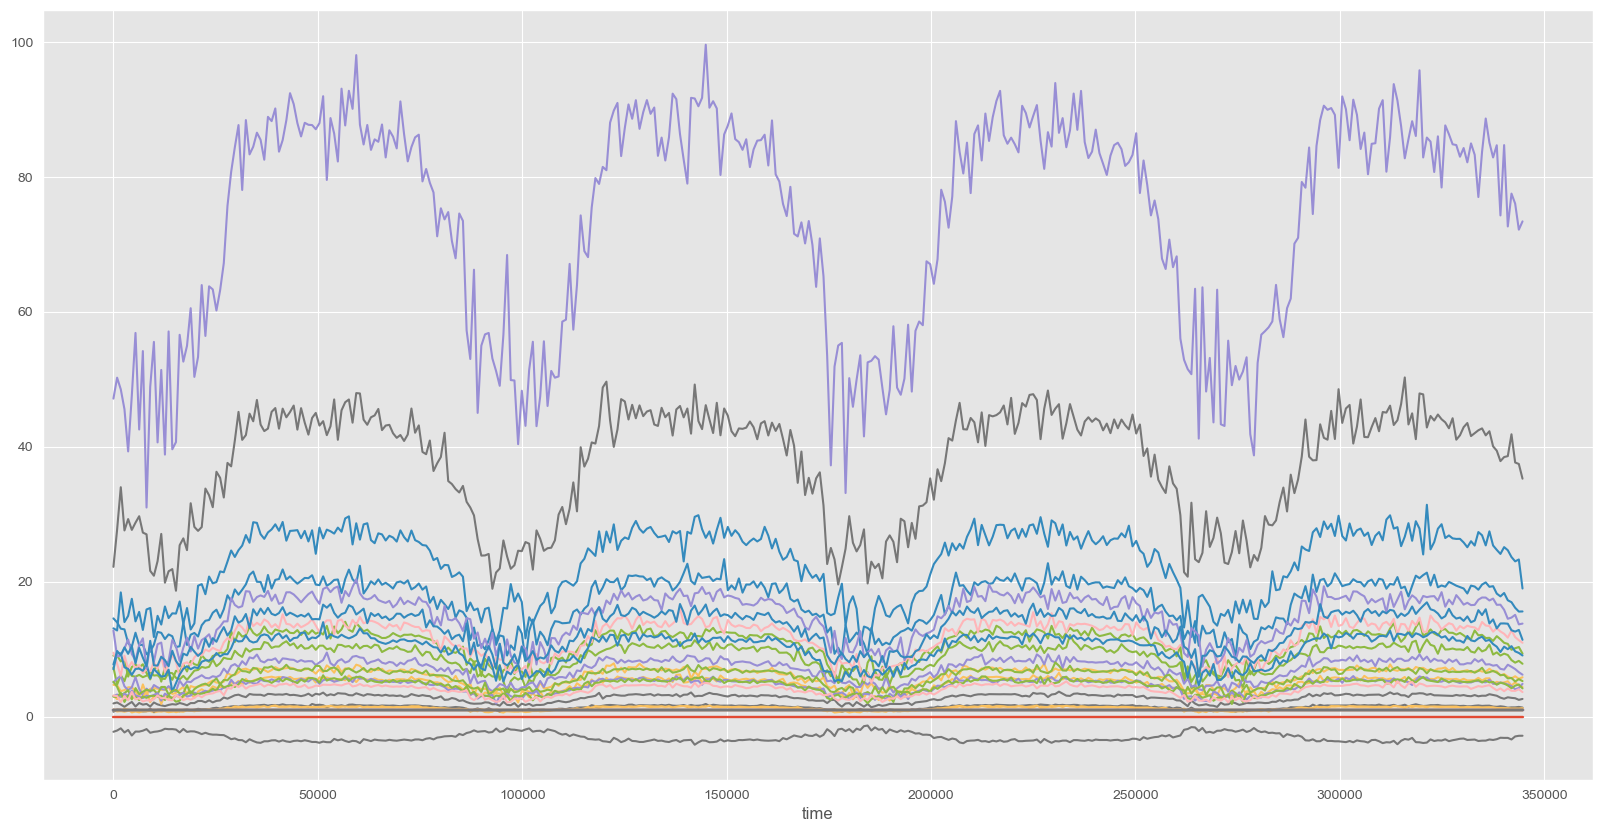

In [16]:
# Plot the input matrix as lines. Use ggplot style
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(20, 10))

_ = OPF_input_dataset.iloc[:24 * 4 * 4, :].plot(legend=False, ax=ax)

In [17]:
# Save the input as a csv file
input_path = processed_data_folder / "input_all_simulations.csv"
OPF_input_dataset.to_csv(input_path)

# Save the input as a numpy array
input_path = processed_data_folder / "input_all_simulations.npy"
np.save(input_path, OPF_input_dataset.values)

## Output - Active and reactive power of the generators (Option 1)

In [18]:
# The output is the part of the state that constaints the active and reactive power of the generators, i.e., those columns that have "Pg" or "Qg" in their name
OPF_output_PgQg_df = sim_x_df.loc[:, sim_x_df.columns.str.contains("Pg|Qg")]
OPF_output_PgQg_df.head()

,Pg,Pg.1,Pg.2,Pg.3,Pg.4,Qg,Qg.1,Qg.2,Qg.3,Qg.4
0,119.042074,22.097926,1.556064e-11,9.785433e-13,-1.749435e-11,3.290923,8.085947,12.239712,-5.999253,-5.999934
900,122.292513,22.721510,1.299740e-11,-5.171726e-12,-1.527436e-11,3.555777,11.674836,9.071357,-5.999496,-5.999981
1800,129.017916,23.992108,-5.607376e-11,2.874593e-11,8.895616e-11,4.095875,11.311077,8.697293,-5.999608,-5.999997
2700,117.756178,21.853135,-5.791049e-11,7.905790e-12,6.502552e-11,3.158221,8.487028,9.737738,-5.999608,-5.977210
3600,109.866263,20.343933,2.196367e-12,2.578333e-13,-1.769730e-12,2.525934,7.436979,10.577337,-5.999475,-5.957341


In [19]:
# Save the output as a csv file
output_path = processed_data_folder / "output_single_example_1.csv"
OPF_output_PgQg_df.to_csv(output_path)

# Save the output as a numpy array
output_path = processed_data_folder / "output_single_example_1.npy"
np.save(output_path, OPF_output_PgQg_df.values)

In [20]:
# Create a class that implements the output function and provides a description of it
class BBM_single_output_1:
    def __init__(self):
        self.description = """The output is the part of the state that contains the active and reactive power of the generators, i.e., those columns that have 'Pg' or 'Qg' in their name.
The output has the form Y = [Pg1, Pg2, ..., PgN, Qg1, Qg2, ..., QgN].
        """

    def __call__(self, x: pd.DataFrame):
        """
        Returns the output of the BBM given the state
        :param x: the state dataframe
        :return:
        """
        # Get the output
        y = x.loc[:, x.columns.str.contains("Pg|Qg")]   # Get the columns that have "Pg" or "Qg" in their name

        return y

In [21]:
# Test the function
OPF_output_PgQg_test = BBM_single_output_1()(sim_x_df)
result = np.allclose(OPF_output_PgQg_df.values, OPF_output_PgQg_test.values)
print(f"Result of comparison: {result}")

# Print the description of the function
print(BBM_single_output_1().description)

Result of comparison: True
The output is the part of the state that contains the active and reactive power of the generators, i.e., those columns that have 'Pg' or 'Qg' in their name.
The output has the form Y = [Pg1, Pg2, ..., PgN, Qg1, Qg2, ..., QgN].
        


In [22]:
# A function that iterates over all the simulations and returns the output for each one
def BBM_all_outputs(data_folder: Path, output_class, **kwargs):
    # Create an empty list to store the outputs
    outputs = []

    # Create a list of the target folders
    target_folders = [f for f in data_folder.iterdir() if f.is_dir() and f.name.isdigit()]

    # Iterate over all the simulations and get the output for each one
    for f in tqdm.tqdm(target_folders):
        # Open the dataframes
        sim_x_df = pd.read_csv(f / "state.csv", index_col=0)

        # Get the output
        y = output_class()(sim_x_df, **kwargs)

        # Append the output to the list
        outputs.append(y)

    # Concatenate the outputs
    matrix = pd.concat(outputs, axis=0)

    # Fix the index by setting numbers from 0 to N-1, where N is the number of simulations and multiplying by the sampling time
    sampling_time = 15 * 60 # 15 minutes
    matrix.index = np.arange(len(matrix)) * sampling_time
    matrix.index.name = "time"

    # Get the description of the output function
    description = output_class().description

    return matrix, description

In [23]:
# Run the function
OPF_output_PgQg, description = BBM_all_outputs(data_folder, BBM_single_output_1)

# Print the shape of the output matrix
print(f"Output shape: {OPF_output_PgQg.shape}")

100%|██████████| 615/615 [00:06<00:00, 92.58it/s] 

Output shape: (59620, 10)


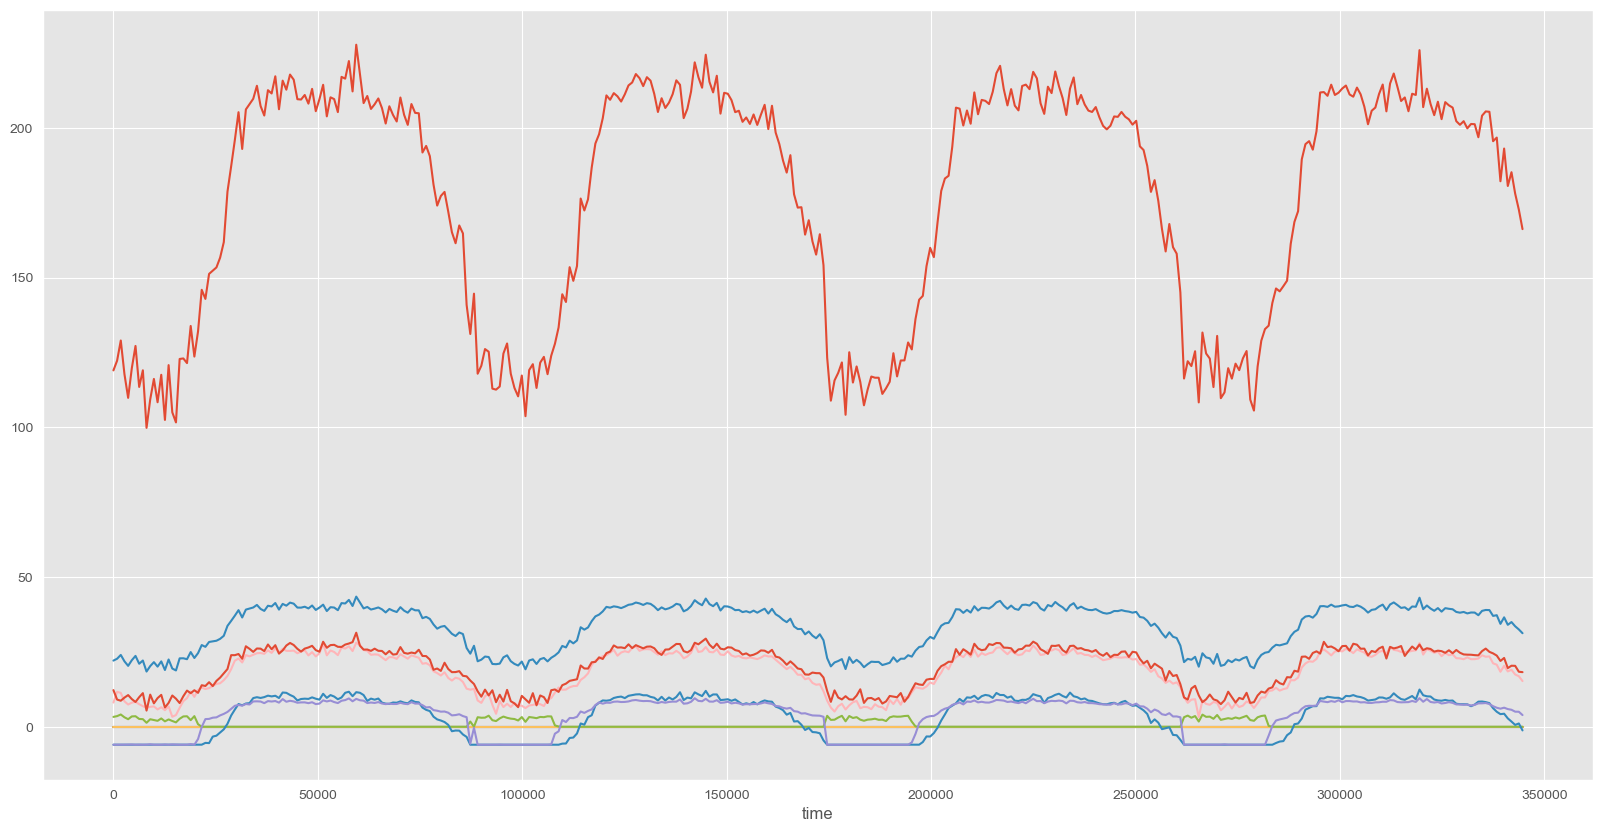

In [24]:
# Plot the output matrix as lines
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(20, 10))

_ = OPF_output_PgQg.iloc[:24 * 4 * 4, :].plot(legend=False, ax=ax)

In [25]:
# Save the output as a csv file
output_path = processed_data_folder / "output_all_simulations_1.csv"
OPF_output_PgQg.to_csv(output_path)

# Save the output as a numpy array
output_path = processed_data_folder / "output_all_simulations_1.npy"
np.save(output_path, OPF_output_PgQg.values)

# Save the description of the output function
description_path = processed_data_folder / "description_output_all_simulations_1.txt"
with open(description_path, "w") as f:
    f.write(description)

## Output - Active power and voltage magnitude of the buses (Option 2)

In [12]:
class BBM_single_output_2:
    def __init__(self):
        self.description = """The output is the part of the state that contains the active power and voltage magnitude of the buses, i.e., those columns that have 'V' or 'Pg' in their name.
The output has the form Y = [V1, V2, ..., VN, Pg1, Pg2, ..., PgN].
        """

    def __call__(self, x: pd.DataFrame, plant: PG.PowerGrid):
        """
        Returns the output of the BBM given the state
        :param x: the state dataframe
        :return:
        """
        # Get the voltage magnitudes of the buses
        V = x.loc[:, x.columns.str.contains("V")]

        # Get the indices of generators with a max rating of active power different from 0 (i.e., not synchronous condensers)
        PV_generators_idx = plant.gen.loc[plant.gen.max_p_mw != 0].index
        PV_generators_bus = plant.gen.iloc[PV_generators_idx].bus

        # Now, the indices of generators with max rating of active power equal to 0 (i.e., synchronous condensers)
        sc_generators_idx = plant.gen.loc[plant.gen.max_p_mw == 0].index
        sc_generators_bus = plant.gen.iloc[sc_generators_idx].bus

        # In V, keep only the voltage magnitudes of the generators
        V_PV = V.iloc[:, PV_generators_bus]

        # Get the active power of the generators, apply the indices obtained above
        Pg = x.loc[:, x.columns.str.contains("Pg")]
        Pg = Pg.iloc[:, PV_generators_idx]

        # Get the voltage magnitudes of the synchronous condensers
        V_sc = V.iloc[:, sc_generators_bus]

        # Concatenate
        y = pd.concat((Pg, V_PV, V_sc), axis=1)

        return y

In [49]:
# Obtain a single output
OPF_output_VPg_df = BBM_single_output_2()(sim_x_df, plant)
OPF_output_VPg_df.head()

,Pg,Pg.1,V,V.1,V.2,V.5,V.7
0,119.042074,22.097926,1.058203,1.043453,1.023394,1.059999,1.040795
900,122.292513,22.721510,1.059300,1.044210,1.023073,1.059999,1.038228
1800,129.017916,23.992108,1.057842,1.041923,1.020314,1.059999,1.035953
2700,117.756178,21.853135,1.056377,1.041820,1.022026,1.059999,1.036544
3600,109.866263,20.343933,1.054923,1.041433,1.023567,1.059999,1.038026


In [50]:
# Save the output as a csv file
output_path = processed_data_folder / "output_single_example_2.csv"
OPF_output_VPg_df.to_csv(output_path)

# Save the output as a numpy array
output_path = processed_data_folder / "output_single_example_2.npy"
np.save(output_path, OPF_output_VPg_df.values)

In [51]:
# Run the function
OPF_output_VPg, description = BBM_all_outputs(data_folder, BBM_single_output_2, plant=plant)

# Print the shape of the output matrix
print(f"Output shape: {OPF_output_VPg.shape}")

100%|██████████| 615/615 [00:08<00:00, 76.00it/s]

Output shape: (59620, 7)


In [52]:
OPF_output_VPg.head()

,Pg,Pg.1,V,V.1,V.2,V.5,V.7
time,,,,,,,
0,119.042074,22.097926,1.058203,1.043453,1.023394,1.059999,1.040795
900,122.292513,22.721510,1.059300,1.044210,1.023073,1.059999,1.038228
1800,129.017916,23.992108,1.057842,1.041923,1.020314,1.059999,1.035953
2700,117.756178,21.853135,1.056377,1.041820,1.022026,1.059999,1.036544
3600,109.866263,20.343933,1.054923,1.041433,1.023567,1.059999,1.038026


In [1]:
# Save the output as a csv file
output_path = processed_data_folder / "output_all_simulations_2.csv"
OPF_output_VPg.to_csv(output_path)

# Save the output as a numpy array
output_path = processed_data_folder / "output_all_simulations_2.npy"
np.save(output_path, OPF_output_VPg.values)

# Save the description of the output function
description_path = processed_data_folder / "description_output_all_simulations_2.txt"
with open(description_path, "w") as f:
    f.write(description)

NameError: name 'processed_data_folder' is not defined

## Output - Voltage angles + Option 2 (Option 3)

In [16]:
sim_x_df.head()

,Pd,Pd.1,Pd.2,Pd.3,Pd.4,Pd.5,Pd.6,Pd.7,Pd.8,Pd.9,Pd.10,Pd.11,Pd.12,Pd.13,Qd,Qd.1,Qd.2,Qd.3,Qd.4,Qd.5,Qd.6,Qd.7,Qd.8,Qd.9,Qd.10,Qd.11,Qd.12,Qd.13,Pg,Pg.1,Pg.2,Pg.3,Pg.4,Qg,Qg.1,Qg.2,Qg.3,Qg.4,V,V.1,V.2,V.3,V.4,V.5,V.6,V.7,V.8,V.9,V.10,V.11,V.12,V.13,phi,phi.1,phi.2,phi.3,phi.4,phi.5,phi.6,phi.7,phi.8,phi.9,phi.10,phi.11,phi.12,phi.13,ILine,ILine.1,ILine.2,ILine.3,ILine.4,ILine.5,ILine.6,ILine.7,ILine.8,ILine.9,ILine.10,ILine.11,ILine.12,ILine.13,ILine.14,LTrafo,LTrafo.1,LTrafo.2,LTrafo.3,LTrafo.4,piGen,piGen.1,piGen.2,piGen.3,piGen.4,piLine,piLine.1,piLine.2,piLine.3,piLine.4,piLine.5,piLine.6,piLine.7,piLine.8,piLine.9,piLine.10,piLine.11,piLine.12,piLine.13,piLine.14,piTrafo,piTrafo.1,piTrafo.2,piTrafo.3,piTrafo.4,piBus,piBus.1,piBus.2,piBus.3,piBus.4,piBus.5,piBus.6,piBus.7,piBus.8,piBus.9,piBus.10,piBus.11,piBus.12,piBus.13,piLoad,piLoad.1,piLoad.2,piLoad.3,piLoad.4,piLoad.5,piLoad.6,piLoad.7,piLoad.8,piLoad.9,piLoad.10,piLoad.11,piLoad.12,piLoad.13
0,0.0,14.556323,47.123383,22.191755,4.712971,7.289077,0.0,0.0,13.082205,5.084837,1.952913,3.102880,9.038774,9.476645,0.0,7.028518,12.763807,-2.247910,1.048428,5.155498,0.0,0.0,7.717014,3.033411,0.721996,0.950130,2.958551,3.101872,119.042074,22.097926,1.556064e-11,9.785433e-13,-1.749435e-11,3.290923,8.085947,12.239712,-5.999253,-5.999934,1.058203,1.043453,1.023394,1.025762,1.026163,1.059999,1.050949,1.040795,1.058759,1.055118,1.055938,1.052157,1.049308,1.043459,0.0,-2.449307,-6.252896,-5.095522,-4.353880,-7.437195,-6.766366,-6.766366,-7.637005,-7.770916,-7.687022,-7.926012,-8.024023,-8.439795,0.324700,0.160684,0.150680,0.117699,0.091295,0.049267,0.128624,7.739273,11.681900,28.872642,13.525791,19.729727,2.325153,3.138499,6.861854,0.151567,0.088007,0.305994,0.058226,0.163715,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
900,0.0,13.968725,50.224851,27.714751,4.644591,4.736703,0.0,0.0,12.766659,5.637937,2.097461,2.600310,9.037949,7.823731,0.0,9.397913,8.906347,-2.061006,0.763172,4.426070,0.0,0.0,9.722176,3.268228,1.054579,0.937279,2.911330,3.048261,122.292513,22.721510,1.299740e-11,-5.171726e-12,-1.527436e-11,3.555777,11.674836,9.071357,-5.999496,-5.999981,1.059300,1.044210,1.023073,1.025156,1.026302,1.059999,1.048407,1.038228,1.055163,1.051681,1.053773,1.052516,1.049237,1.042637,0.0,-2.518611,-6.537822,-5.256077,-4.441578,-7.251024,-6.784329,-6.784329,-7.582922,-7.709633,-7.562531,-7.697760,-7.812805,-8.189520,0.333982,0.164208,0.159145,0.122449,0.092743,0.054378,0.141598,10.669310,10.882996,28.354797,12.881038,15.551876,4.542805,3.633305,6.823326,0.138099,0.080584,0.288545,0.058370,0.148210,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1800,0.0,13.032938,48.497201,33.992821,3.780178,6.144648,0.0,0.0,18.406073,6.028764,1.790102,2.968753,8.179026,6.032426,0.0,9.361921,9.052135,-1.734875,0.826703,3.176092,0.0,0.0,9.095054,2.930612,1.026258,0.813046,3.528570,2.154418,129.017916,23.992108,-5.607376e-11,2.874593e-11,8.895616e-11,4.095875,11.311077,8.697293,-5.999608,-5.999997,1.057842,1.041923,1.020314,1.021645,1.023466,1.059999,1.046155,1.035953,1.053723,1.050618,1.053336,1.052442,1.049570,1.044537,0.0,-2.643894,-6.749596,-5.700619,-4.790780,-7.816055,-7.456020,-7.456020,-8.371394,-8.472158,-8.213040,-8.270594,-8.339220,-8.755142,0.350170,0.175651,0.162197,0.135377,0.101308,0.044518,0.158184,12.467152,11.036142,26.970249,11.111704,10.744351,7.281571,2.921316,6.526002,0.158358,0.092084,0.294798,0.058501,0.168965,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2700,0.0,12.927204,45.545196,27.585807,3.9

In [17]:
class BBM_single_output_3:
    def __init__(self):
        self.description = """The output is the part of the state that contains the voltage angles and active power of the buses, i.e., those columns that have 'Va' or 'Pg' in their name.
The output has the form Y = [Va1, Va2, ..., VaN, Pg1, Pg2, ..., PgN].
        """

    def __call__(self, x: pd.DataFrame, plant: PG.PowerGrid):
        """
        Returns the output of the BBM given the state
        :param x:
        :param plant:
        :return:
        """
        # Get the indices of generators with a max rating of active power different from 0 (i.e., not synchronous condensers)
        PV_generators_idx = plant.gen.loc[plant.gen.max_p_mw != 0].index

        # Get the angles of such generators
        Va = x.loc[:, x.columns.str.contains("phi")]
        Va = Va.iloc[:, PV_generators_idx]

        # Get the output from Option 2
        y = BBM_single_output_2()(x, plant)

        # Concatenate
        y = pd.concat((Va, y), axis=1)

        return y

In [19]:
# Obtain a single output
OPF_output_VaPg_df = BBM_single_output_3()(sim_x_df, plant)
OPF_output_VaPg_df.head()

,phi,phi.1,Pg,Pg.1,V,V.1,V.2,V.5,V.7
0,0.0,-2.449307,119.042074,22.097926,1.058203,1.043453,1.023394,1.059999,1.040795
900,0.0,-2.518611,122.292513,22.721510,1.059300,1.044210,1.023073,1.059999,1.038228
1800,0.0,-2.643894,129.017916,23.992108,1.057842,1.041923,1.020314,1.059999,1.035953
2700,0.0,-2.424513,117.756178,21.853135,1.056377,1.041820,1.022026,1.059999,1.036544
3600,0.0,-2.251990,109.866263,20.343933,1.054923,1.041433,1.023567,1.059999,1.038026


In [20]:
# Save the output as a csv file
output_path = processed_data_folder / "output_single_example_3.csv"
OPF_output_VaPg_df.to_csv(output_path)

# Save the output as a numpy array
output_path = processed_data_folder / "output_single_example_3.npy"
np.save(output_path, OPF_output_VaPg_df.values)

In [23]:
# Run the function
OPF_output_VaPg, description = BBM_all_outputs(data_folder, BBM_single_output_3, plant=plant)

# Print the shape of the output matrix
print(f"Output shape: {OPF_output_VaPg.shape}")

100%|██████████| 615/615 [00:08<00:00, 70.21it/s]


Output shape: (59620, 9)


In [24]:
# Save the output as a csv file
output_path = processed_data_folder / "output_all_simulations_3.csv"
OPF_output_VaPg.to_csv(output_path)

# Save the output as a numpy array
output_path = processed_data_folder / "output_all_simulations_3.npy"
np.save(output_path, OPF_output_VaPg.values)

# Save the description of the output function
description_path = processed_data_folder / "description_output_all_simulations_3.txt"
with open(description_path, "w") as f:
    f.write(description)

,p_mw,q_mvar,va_degree,vm_pu
0,1.283206e+02,2.260782,0.000000,1.060000
1,2.387279e+01,11.417640,-2.643115,1.045078
2,-1.576831e-11,11.915620,-6.953246,1.023033
3,1.127381e-11,-5.998854,-7.783177,1.059999
4,2.822012e-11,-5.619571,-7.321202,1.039022
